In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reading data into pandas dataframe

In [73]:
df=pd.read_csv('Data.csv')

In [74]:
df

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578


# Data Cleaning

In [75]:
#droping rows whose city is not lahore
df = df[df['city'] =='Lahore'].copy().reset_index(drop=True)
df.shape

(41427, 18)

In [76]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [77]:
#null values
df.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           10203
agent            10204
Total_Area           0
dtype: int64

In [78]:
df.dtypes

Unnamed: 0         int64
property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Total_Area       float64
dtype: object

In [79]:
#as there are two columns with a lot of null values we can use different methods to treat null values like forward and backward fill 
#interpolation etc but in our case null values are in those columns which are not required in our data so we can drop those columns
df.drop(['agency', 'agent'], axis=1,inplace=True)
df.isnull().sum()

Unnamed: 0       0
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [80]:
#we are assuming that property_id and location_id doesn't carry much information and hence can be dropped. 
#'pageurl' is just for reference and hence can be dropped as well.
#'location' is dropped as well because this information is already avaialable in longitude and latitude. 
df.drop(['Unnamed: 0', 'property_id','location_id','page_url','purpose','date_added','city','province_name','location'], axis=1,inplace=True)
df

,property_type,price,latitude,longitude,baths,bedrooms,Total_Area
0,House,220000000,31.483869,74.325686,0,0,32670.000
1,House,40000000,31.431593,74.179980,5,5,5445.000
2,House,9500000,31.499348,74.416959,0,3,2450.259
3,House,125000000,31.522069,74.355512,7,8,5445.000
4,House,21000000,31.506483,74.286017,5,6,2994.761
...,...,...,...,...,...,...,...
41422,House,44000000,31.486906,74.385896,7,6,5445.000
41423,House,55000000,31.466227,74.440012,6,5,5445.000
41424,House,20500000,31.494408,74.437666,4,3,2722.510
41425,House,170000000,31.475378,74.373808,5,5,10890.000


In [81]:
#now df contains all related columns
df.dtypes

property_type     object
price              int64
latitude         float64
longitude        float64
baths              int64
bedrooms           int64
Total_Area       float64
dtype: object

In [82]:
#dropping duplicates values and reseting index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,property_type,price,latitude,longitude,baths,bedrooms,Total_Area
0,House,220000000,31.483869,74.325686,0,0,32670.000
1,House,40000000,31.431593,74.179980,5,5,5445.000
2,House,9500000,31.499348,74.416959,0,3,2450.259
3,House,125000000,31.522069,74.355512,7,8,5445.000
4,House,21000000,31.506483,74.286017,5,6,2994.761
...,...,...,...,...,...,...,...
27645,House,22500000,31.442248,74.402375,3,3,2722.510
27646,House,22500000,31.438989,74.404049,3,3,2722.510
27647,House,39000000,31.468350,74.401603,6,5,5445.000
27648,House,28000000,31.359647,74.253073,7,6,5445.000


# Data transformation

In [83]:
#Getting all unique values in order to map property_type according to categorical ordinal encoding
df.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Farm House', 'Penthouse',
       'Upper Portion', 'Room'], dtype=object)

In [84]:
#mean of all values in ascending order will give the idea about ranking
df.groupby('property_type')['price'].mean().reset_index().sort_values(by='price',ascending=True)

,property_type,price
6,Upper Portion,3.865833e+06
3,Lower Portion,5.347001e+06
1,Flat,7.976855e+06
5,Room,1.190538e+07
4,Penthouse,1.872500e+07
2,House,2.658294e+07
0,Farm House,6.146067e+07


In [85]:
#rank 0 to "Upper Portion",likewise rank 6 to "Farm House"
from pandas.api.types import CategoricalDtype
# Define the property mapping array
property_mapping = ["Upper Portion", "Lower Portion", "Flat", "Room", "Penthouse", "House", "Farm House"]

# Define a CategoricalDtype with the desired order
property_dtype = pd.CategoricalDtype( categories=property_mapping,ordered=True)

# Convert the 'property_type' column to the defined CategoricalDtype
df['PropertyType'] = df['property_type'].astype(property_dtype).cat.codes


In [88]:
df['PropertyType'].unique()

array([5, 2, 1, 6, 4, 0, 3], dtype=int8)

In [89]:
#after transformation categorical property_type is being dropped
df.drop('property_type',axis=1,inplace=True)
df

,price,latitude,longitude,baths,bedrooms,Total_Area,PropertyType
0,220000000,31.483869,74.325686,0,0,32670.000,5
1,40000000,31.431593,74.179980,5,5,5445.000,5
2,9500000,31.499348,74.416959,0,3,2450.259,5
3,125000000,31.522069,74.355512,7,8,5445.000,5
4,21000000,31.506483,74.286017,5,6,2994.761,5
...,...,...,...,...,...,...,...
27645,22500000,31.442248,74.402375,3,3,2722.510,5
27646,22500000,31.438989,74.404049,3,3,2722.510,5
27647,39000000,31.468350,74.401603,6,5,5445.000,5
27648,28000000,31.359647,74.253073,7,6,5445.000,5


# Removing Outliers

In [90]:
#Basically to remove outliers we calculated z-score of each column and if it is greater than abs 3,which is standard value,that 
#data cell will be kept True and even one data cell in whole row is True it will be conidered as outlier row
from scipy import stats
z_scores = stats.zscore(df)
#if you want to visualize then uncomment
#z_scores_df = pd.DataFrame(z_scores, columns=df.columns)
#print(z_scores_df)
threshold =3
# Creating a boolean mask for outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)
#outliers = df[outliers_mask] outliers
df_cleaned = df[~outliers_mask]
df_cleaned.reset_index
df_cleaned

,price,latitude,longitude,baths,bedrooms,Total_Area,PropertyType
1,40000000,31.431593,74.179980,5,5,5445.000,5
2,9500000,31.499348,74.416959,0,3,2450.259,5
3,125000000,31.522069,74.355512,7,8,5445.000,5
4,21000000,31.506483,74.286017,5,6,2994.761,5
5,52000000,31.495909,74.350569,6,5,5445.000,5
...,...,...,...,...,...,...,...
27645,22500000,31.442248,74.402375,3,3,2722.510,5
27646,22500000,31.438989,74.404049,3,3,2722.510,5
27647,39000000,31.468350,74.401603,6,5,5445.000,5
27648,28000000,31.359647,74.253073,7,6,5445.000,5


In [92]:
#saved cleaned data set
df_cleaned.to_csv("Cleaned_Data.CSV")

# Normalization

In [93]:
#As our dataset have different ranges in different column,so normalization was more feasible for our dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_cleaned)
normalized_df = pd.DataFrame(normalized_data, columns=df_cleaned.columns)
normalized_df

,price,latitude,longitude,baths,bedrooms,Total_Area,PropertyType
0,0.258065,0.404385,0.226302,0.5,0.625,0.009524,0.666667
1,0.061290,0.557647,0.702849,0.0,0.375,0.004286,0.666667
2,0.806452,0.609043,0.579284,0.7,1.000,0.009524,0.666667
3,0.135484,0.573787,0.439535,0.5,0.750,0.005238,0.666667
4,0.335484,0.549868,0.569344,0.6,0.625,0.009524,0.666667
...,...,...,...,...,...,...,...
25830,0.145161,0.428486,0.673522,0.3,0.375,0.004762,0.666667
25831,0.145161,0.421115,0.676888,0.3,0.375,0.004762,0.666667
25832,0.251613,0.487530,0.671970,0.6,0.625,0.009524,0.666667
25833,0.180645,0.241642,0.373287,0.7,0.750,0.009524,0.666667


# Dimensionality Reduction:

In [20]:
#used PCA to keep top 5 columns which are contributing the most
from sklearn.decomposition import PCA
# Initializing PCA with the desired number of components
n_components = 5 # You can choose the number of components you want to retain
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(normalized_df)
# Creating a DataFrame with the reduced data
reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
reduced_df

,PC1,PC2,PC3,PC4,PC5
0,0.230811,0.255863,0.096342,-0.017269,0.116534
1,-0.372126,-0.161099,0.081269,-0.036895,-0.135969
2,0.704540,-0.270593,0.436983,0.109512,0.227864
3,0.251807,0.006497,0.042051,-0.188670,0.017717
4,0.300213,-0.117490,0.030142,0.056058,0.088147
...,...,...,...,...,...
25830,-0.109470,-0.083507,-0.031804,0.123474,-0.103903
25831,-0.108684,-0.082196,-0.031547,0.128316,-0.110213
25832,0.285305,-0.150399,-0.027910,0.069048,-0.040463
25833,0.454181,0.233054,-0.012237,0.032033,-0.095445


# Data validation

In [94]:
#Completeness Validation
df_cleaned.isnull().sum()

price           0
latitude        0
longitude       0
baths           0
bedrooms        0
Total_Area      0
PropertyType    0
dtype: int64

In [95]:
df_cleaned.describe()

,price,latitude,longitude,baths,bedrooms,Total_Area,PropertyType
count,2.583500e+04,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000,25835.000000
mean,2.331357e+07,31.473063,74.323159,3.633288,3.868937,5945.870158,5.007083
std,2.220632e+07,0.066046,0.086358,2.297103,1.577968,17517.311879,0.097920
min,1.000000e+00,31.252821,74.067444,0.000000,0.000000,0.000000,3.000000
25%,9.000000e+06,31.431593,74.261127,2.000000,3.000000,1361.255000,5.000000
50%,1.600000e+07,31.469155,74.306667,4.000000,4.000000,2722.510000,5.000000
75%,2.950000e+07,31.518337,74.401431,5.000000,5.000000,5445.000000,5.000000
max,1.550000e+08,31.694905,74.564727,10.000000,8.000000,571725.000000,6.000000


In [99]:
# Import necessary libraries for creating a Bokeh plot and defining tooltips
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Define tooltips for hover interaction
TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("PropertyType", "@PropertyType"),
    ("Latitude", "@latitude"),
    ("Longitude", "@longitude"),
    ("Baths", "@baths"),
    ("Bedrooms", "@bedrooms"),
    ("Total_Area", "@Total_Area"),
    ("(Price)", "(@price)"),
])

# Create a new plot with a title and axis labels
p = figure(
    title="House Prediction",
    x_axis_label='price',
    y_axis_label='Total_Area',
    width=700,
    height=700,
    tools=[TOOLTIPS]  # Include the HoverTool for tooltips
)

# Add circles to the plot using data from the 'df_cleaned' source
p.circle('price', 'Total_Area', size=10, source=df_cleaned)

# Show the plot
show(p)


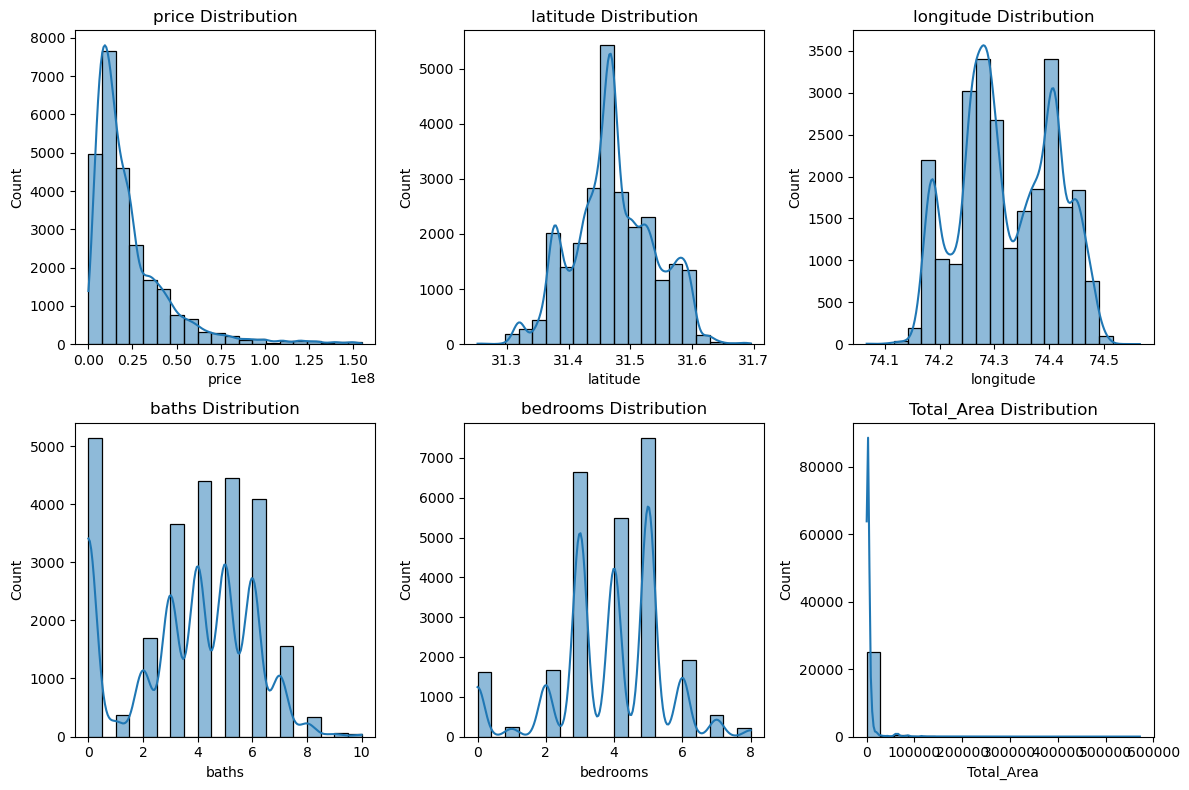

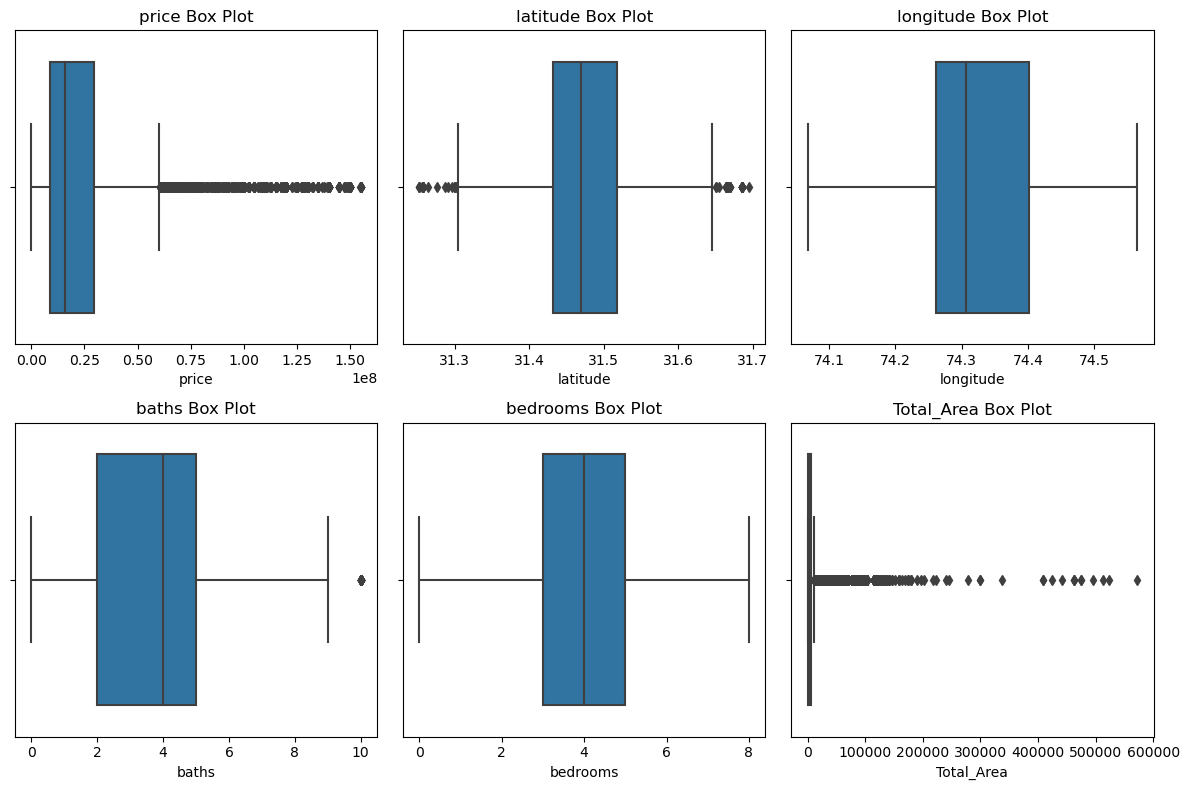

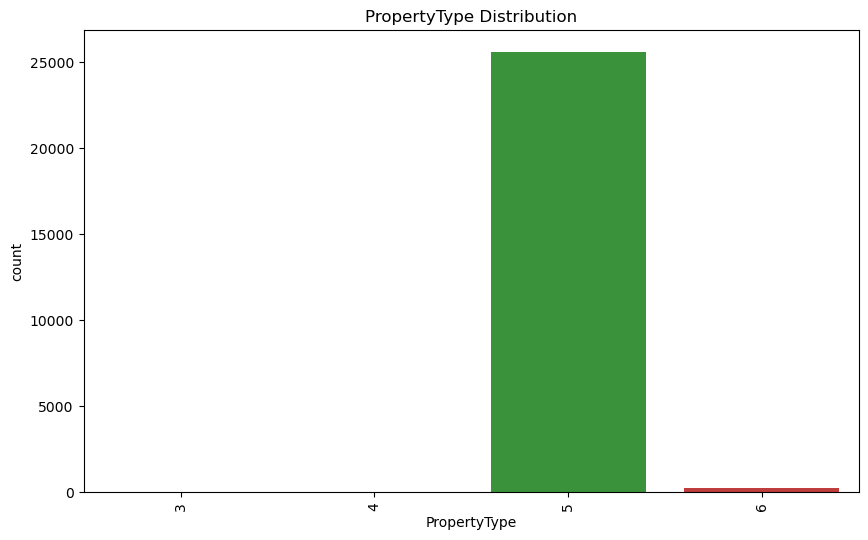

              price      latitude     longitude         baths      bedrooms  \
count  2.583500e+04  25835.000000  25835.000000  25835.000000  25835.000000   
mean   2.331357e+07     31.473063     74.323159      3.633288      3.868937   
std    2.220632e+07      0.066046      0.086358      2.297103      1.577968   
min    1.000000e+00     31.252821     74.067444      0.000000      0.000000   
25%    9.000000e+06     31.431593     74.261127      2.000000      3.000000   
50%    1.600000e+07     31.469155     74.306667      4.000000      4.000000   
75%    2.950000e+07     31.518337     74.401431      5.000000      5.000000   
max    1.550000e+08     31.694905     74.564727     10.000000      8.000000   

          Total_Area  
count   25835.000000  
mean     5945.870158  
std     17517.311879  
min         0.000000  
25%      1361.255000  
50%      2722.510000  
75%      5445.000000  
max    571725.000000  


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visual inspection with histograms and box plots for numeric columns
numeric_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area']

# Plot histograms for numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_cleaned, x=column, bins=20, kde=True)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

# Box plots for numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

# Visual inspection of the 'PropertyType' column using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='PropertyType')
plt.xticks(rotation=90)
plt.title('PropertyType Distribution')
plt.show()

# Summary statistics for numeric columns
summary_stats = df_cleaned[numeric_columns].describe()
print(summary_stats)
